This first part is only needed as we have to mock VASP here as we cannot run it directly in a jupyter notebook:

In [1]:
from mock_vasp import TEST_DIR, mock_vasp

ref_paths = {
        "phonon static 1/1": "Si_phonons_3/phonon_static_1_1",
        "static": "Si_phonons_3/static",
        "tight relax 1": "Si_phonons_3/tight_relax_1",
        "tight relax 2": "Si_phonons_3/tight_relax_2",
        "dielectric": "Si_phonons_3/dielectric",
    }

/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phonon Workflow

## Background
The Phonon workflow is based on the finite displacement approach as implemented in Phonopy.

If you want to read more about Phonopy, please read Togo’s paper: https://doi.org/10.7566/JPSJ.92.012001

## Let's run the workflow
Now, we load a structure and other important functions and classes for running the phonon workflow.

In [2]:
from pymatgen.core import Structure
from atomate2.vasp.flows.phonons import PhononMaker
from jobflow import run_locally, JobStore
from maggma.stores import MemoryStore

job_store = JobStore(MemoryStore(), additional_stores={"data": MemoryStore()})
si_structure = Structure.from_file(TEST_DIR / "structures" / "Si.cif")


Then one can use the `PhononMaker` to generate a `Flow`. For testing here, we are choosing a very small supercell length (`min_length`). Ideally, a larger cell should be chosen. For non-metallic systems with more than one element, one might need to add the non-analytical term correction considering very long-ranging forces by computing the `BORN` charges with the `born_maker`. Of course, the structure should also be relaxed in advance with the `bulk_relax_maker`. Please make sure this is done very accurately.

In [3]:
flow=PhononMaker(
        min_length=3.0,
        use_symmetrized_structure=None,
        generate_frequencies_eigenvectors_kwargs={"tstep": 100},
        create_thermal_displacements=True,
        store_force_constants=True,
        born_maker=None,
    ).make(si_structure)

The phonon run will first perform a bulk relaxation, then the displacements are generated and run. As we currently don’t have a way to compute BORN charges with such potentials, a non-analytical term correction is not performed here. We can visualize the flow first.

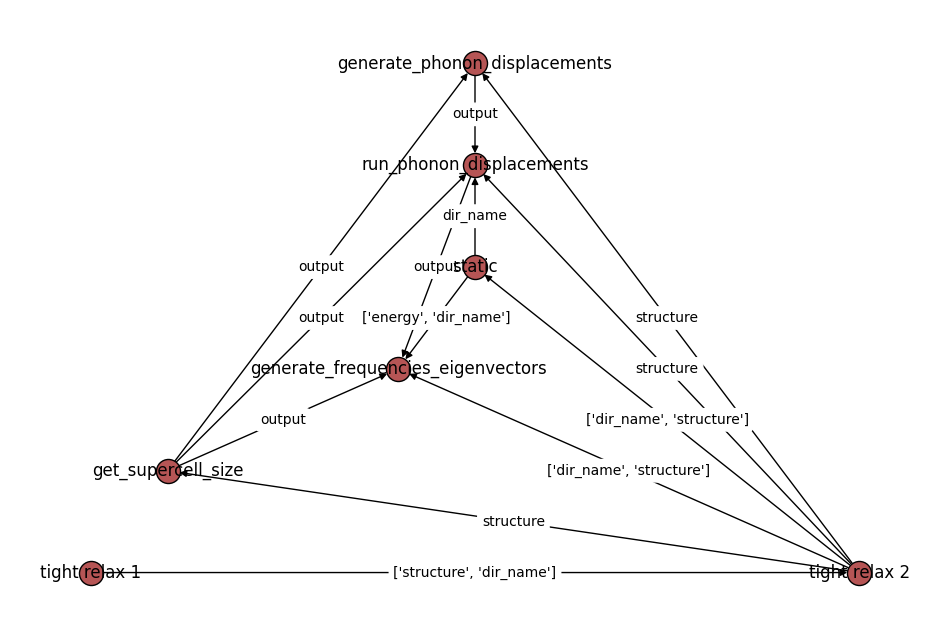

In [4]:
flow.draw_graph().show()

We now run the flow with  `run_locally`. We mock the run here. Normally, you would simply use `run_locally` without the `with mock_vasp`

In [5]:
with mock_vasp(ref_paths=ref_paths) as mf:
    run_locally(flow, create_folders=True,
        ensure_success=True,
        raise_immediately=True,
                store=job_store)

2025-02-07 23:16:40,808 INFO Started executing jobs locally
2025-02-07 23:16:40,814 INFO Starting job - tight relax 1 (a2da27b5-def6-41e6-b5c5-6a9552fe839c)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


2025-02-07 23:16:41,672 INFO Finished job - tight relax 1 (a2da27b5-def6-41e6-b5c5-6a9552fe839c)
2025-02-07 23:16:41,672 WARNING Response.stored_data is not supported with local manager.
2025-02-07 23:16:41,673 INFO Starting job - tight relax 2 (8cb9dcbd-a140-449a-a3c8-1bfc0e6a82a1)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpduvvl0_0/job_2025-02-07-22-16-41-673155-76431/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-07 23:16:42,983 INFO Finished job - tight relax 2 (8cb9dcbd-a140-449a-a3c8-1bfc0e6a82a1)
2025-02-07 23:16:42,983 WARNING Response.stored_data is not supported with local manager.
2025-02-07 23:16:42,984 INFO Starting job - get_supercell_size (34bedd82-f290-4404-9b1f-074b4321526c)
2025-02-07 23:16:42,997 INFO Finished job - get_supercell_size (34bedd82-f290-4404-9b1f-074b4321526c)
2025-02-07 23:16:42,998 INFO Starting job - static (c239b33e-cfc3-457b-858a-e28029d45430)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpduvvl0_0/job_2025-02-07-22-16-42-997738-44040/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-07 23:16:43,649 INFO Finished job - static (c239b33e-cfc3-457b-858a-e28029d45430)
2025-02-07 23:16:43,649 WARNING Response.stored_data is not supported with local manager.
2025-02-07 23:16:43,650 INFO Starting job - generate_phonon_displacements (c07ffa41-28c9-4309-b86f-bc3848f59936)
2025-02-07 23:16:43,707 INFO Finished job - generate_phonon_displacements (c07ffa41-28c9-4309-b86f-bc3848f59936)
2025-02-07 23:16:43,708 INFO Starting job - run_phonon_displacements (b8098d3b-e91f-4971-a514-64723e88d29f)
2025-02-07 23:16:43,815 INFO Finished job - run_phonon_displacements (b8098d3b-e91f-4971-a514-64723e88d29f)
2025-02-07 23:16:43,817 INFO Starting job - phonon static 1/1 (5f879c34-b413-4a3b-9b53-7e2804c03ab2)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpduvvl0_0/job_2025-02-07-22-16-43-817582-98313/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-07 23:16:44,599 INFO Finished job - phonon static 1/1 (5f879c34-b413-4a3b-9b53-7e2804c03ab2)
2025-02-07 23:16:44,600 WARNING Response.stored_data is not supported with local manager.
2025-02-07 23:16:44,600 INFO Starting job - store_inputs (b8098d3b-e91f-4971-a514-64723e88d29f, 2)
2025-02-07 23:16:44,602 INFO Finished job - store_inputs (b8098d3b-e91f-4971-a514-64723e88d29f, 2)
2025-02-07 23:16:44,602 INFO Starting job - generate_frequencies_eigenvectors (e58cd212-427e-4ef9-9e9f-92898ff3cb3f)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribut

2025-02-07 23:16:51,853 INFO Finished job - generate_frequencies_eigenvectors (e58cd212-427e-4ef9-9e9f-92898ff3cb3f)
2025-02-07 23:16:51,854 INFO Finished executing jobs locally


In [6]:
from pymatgen.phonon.bandstructure import PhononBandStructureSymmLine
from pymatgen.phonon.dos import PhononDos
from pymatgen.phonon.plotter import PhononBSPlotter, PhononDosPlotter
from jobflow import SETTINGS

job_store.connect()

result = job_store.query_one(
    {"name": "generate_frequencies_eigenvectors"},
    properties=[
        "output.phonon_dos",
        "output.phonon_bandstructure",
    ],
    load=True,
    sort={"completed_at": -1} # to get the latest computation
)

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{Frequencies\\ (THz)}$'>

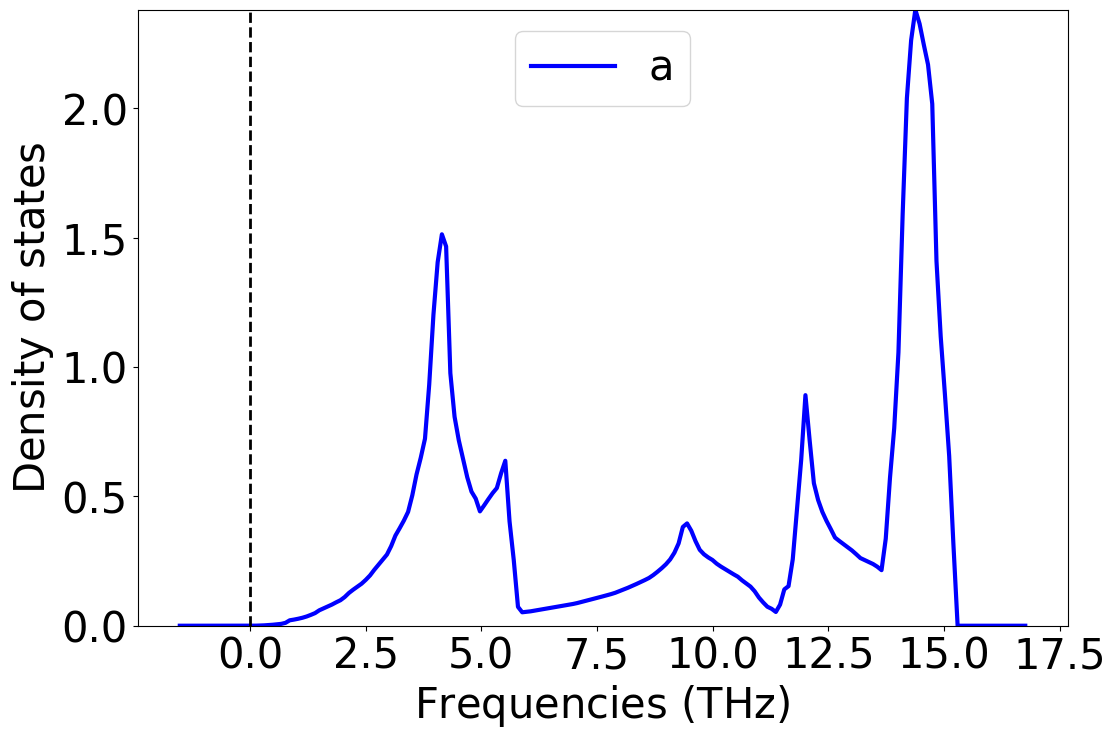

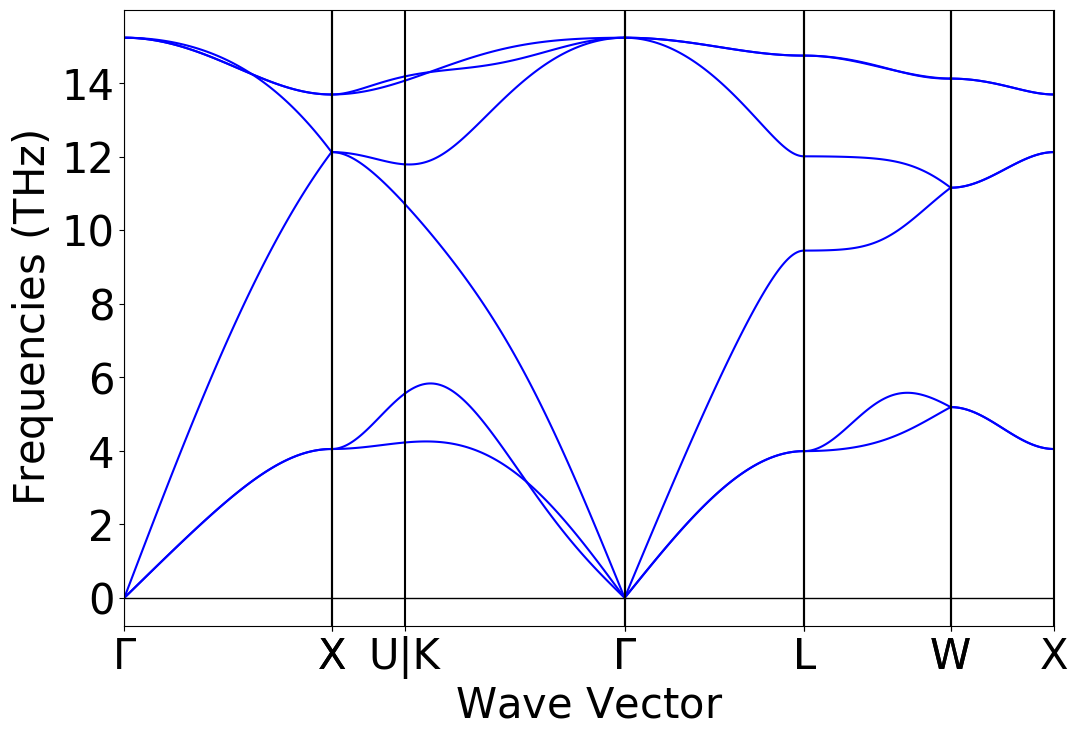

In [7]:
ph_bs = PhononBandStructureSymmLine.from_dict(result['output']['phonon_bandstructure']) # get pymatgen bandstructure object
ph_dos = PhononDos.from_dict(result['output']['phonon_dos']) # get pymatgen phonon dos object

# initialize dos plotter and visualize dos plot
dos_plot = PhononDosPlotter()
dos_plot.add_dos(label='a', dos=ph_dos)
dos_plot.get_plot()

# initialize Phonon bandstructure plotter and visualize band structure plot
bs_plot = PhononBSPlotter(bs=ph_bs)
bs_plot.get_plot()

One can run the same workflow with a forcefield as well. Here, we cannot consider BORN charges yet as there is no forcefield equivalent. You can find this tutorial in the force field tutorials.